In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import confusion_matrix


In [2]:
df = pd.read_csv('../../data/processed/preprocessed_cupid.csv', usecols=['age', 'sex','#anwps', 'clean_text', 'isced', 'isced2'])


In [3]:
df.head()
df = df.dropna(subset=['clean_text', 'isced'])

# import contractions
# df['clean_textk'] = df['clean_text'].str.lower()


# def expand_contractions(text):
#     expanded = contractions.fix(text)
#     return expanded

# df['v'] = df.apply(lambda x: expand_contractions(x['clean_textk']), axis=1)


In [4]:
# df['s']

## Imbalanced datasets
### In a dataset with highly imbalanced classes, if the classifier always "predicts" the most common class without performing any analysis of the features, it will still have a high accuracy rate


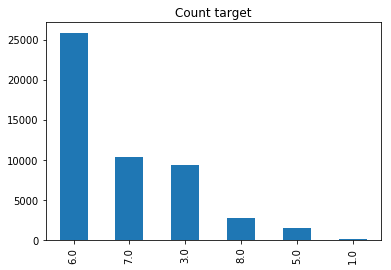

In [5]:
df.isced.value_counts().plot(kind='bar', title= 'Count target')

In [6]:
# # Remove classes 1, 5 and 8 from dataset
df = df[df['isced'].isin([6.0, 7.0, 3.0, 8.0])]

In [7]:
# df.isced.value_counts().plot(kind='bar', title= 'Count target')

In [8]:
def plot_conf(conf_matrix):
    print('Confusion matrix:\n', conf_matrix)
    labels = ['3', '6', '7', '8']

    fig = plt.figure()
    ax = fig.add_subplot(111)
    cax = ax.matshow(conf_matrix, cmap=plt.cm.Blues)
    fig.colorbar(cax)
    ax.set_xticklabels([''] + labels)
    ax.set_yticklabels([''] + labels)
    plt.xlabel('Predicted class')
    plt.ylabel('Actual class')
    plt.show()

In [9]:
df = df.dropna(subset=['clean_text', 'isced'])
# df = df.dropna(subset=['stemmed', 'isced'])

corpus = df['clean_text']
# corpus = df['stemmed']
target = df["isced"]
# frequency encoding scikit-learn
vectorizer = CountVectorizer(binary=False, ngram_range=(1, 2))
vectors = vectorizer.fit_transform(corpus)
X_train, X_val, y_train, y_val = train_test_split(vectors, target, train_size=0.75,
                                                          test_size=0.25, random_state = 0)

In [10]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler


Using TensorFlow backend.


In [11]:
# rus = RandomUnderSampler(random_state=42)
# X_res, y_res = rus.fit_resample(X_train, y_train)
# y_res.value_counts().plot(kind='bar', title= 'Count target')


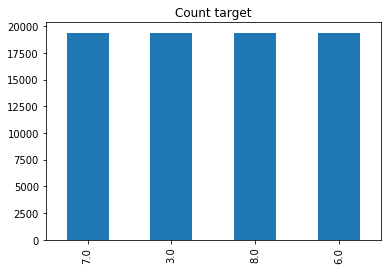

In [12]:
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X_train, y_train)
y_ros.value_counts().plot(kind='bar', title= 'Count target')

In [13]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import pandas as pd



model = make_pipeline(MultinomialNB())



In [14]:
model.fit(X_ros, y_ros)

Pipeline(memory=None,
         steps=[('multinomialnb',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

In [15]:
gnb_predictions = model.predict(X_val)


Final Accuracy for NB: 0.5773084886128365
Confusion matrix:
 [[1302  969   91    6]
 [ 667 4919  832   60]
 [ 131 1667  719   35]
 [  32  415  199   31]]


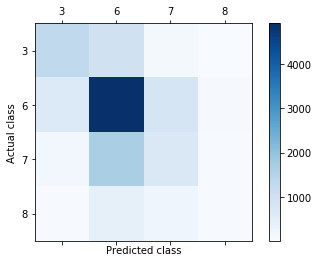

              precision    recall  f1-score   support

         3.0       0.61      0.55      0.58      2368
         6.0       0.62      0.76      0.68      6478
         7.0       0.39      0.28      0.33      2552
         8.0       0.23      0.05      0.08       677

    accuracy                           0.58     12075
   macro avg       0.46      0.41      0.42     12075
weighted avg       0.55      0.58      0.55     12075



In [19]:
print("Final Accuracy for NB: %s"% accuracy_score(y_val, gnb_predictions))
cm = confusion_matrix(y_val, gnb_predictions) 
plot_conf(cm)
from sklearn.metrics import classification_report

print(classification_report(y_val, gnb_predictions))

Final Accuracy for NB: 0.5933747412008281
Confusion matrix:
 [[1375  891   90   12]
 [ 685 4881  823   89]
 [ 158 1540  783   71]
 [  41  304  206  126]]


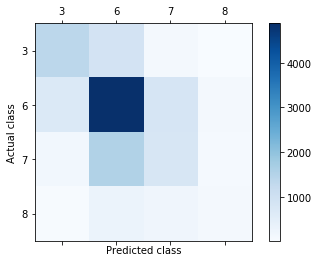

In [18]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, multi_class='ovr', solver='liblinear').fit(X_ros, y_ros)
logistic_predictions = clf.predict(X_val)
print("Final Accuracy for NB: %s"% accuracy_score(y_val, logistic_predictions))
cm = confusion_matrix(y_val, logistic_predictions) 
plot_conf(cm)

In [10]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg').fit(X_ros, y_ros)
logistic_predictions = clf.predict(X_val)
print("Final Accuracy for NB: %s"% accuracy_score(y_val, logistic_predictions))
cm = confusion_matrix(y_val, logistic_predictions) 
plot_conf(cm)